# In Class Notebook, Week 02

To access this in near-real time try: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2022/blob/master/week02/inClass_week02.ipynb

Or paste this URL into the nbviewer interface for a plain-text rendering:

https://kokes.github.io/nbviewer.js/viewer.html

Hey I'm writing a thing!

In [2]:
import matplotlib.pyplot as plt # shorthand so I don't have to type as much
import numpy as np

In [3]:
from PIL import Image

In [4]:
# my directory structure on a mac
im = Image.open('/Users/jnaiman/Downloads/stitch_reworked.png')

# windows it will be like: C://jnaiman/Downloads ?

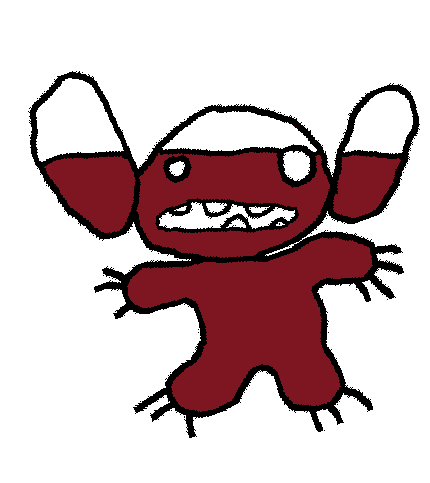

In [5]:
im

In [6]:
type(im)

PIL.PngImagePlugin.PngImageFile

In [33]:
im_data = np.array(im)

In [10]:
im_data.shape # 483 y-pixels, 430 x-pixels, 4 color channels (RGBA)

(483, 430, 4)

In [11]:
np.unique(im_data)

array([  0,  22,  33, 126, 255], dtype=uint8)

In [13]:
im_data.reshape(-1, im_data.shape[2]) # I've used reshape to turn my 
#                                       3D object into a list of pixels

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=uint8)

In [14]:
im_data.reshape?

In [17]:
np.unique(im_data.reshape(-1,im_data.shape[2]),axis=0)
# this unravels along the "long" list of pixels and looks for unique 4-color combos

array([[  0,   0,   0,   0],
       [  0,   0,   0, 255],
       [126,  22,  33, 255],
       [255, 255, 255, 255]], dtype=uint8)

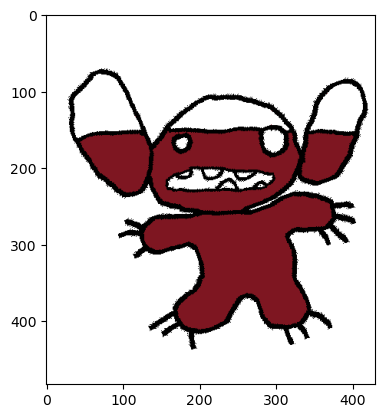

In [18]:
plt.imshow(im_data)

We have 4 colors, but one is perfectly see-through (Alpha channel = 0), what pixels are those?

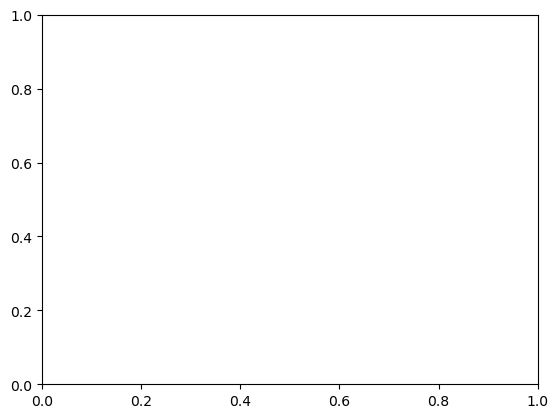

In [19]:
fig, ax = plt.subplots()

In [20]:
ax

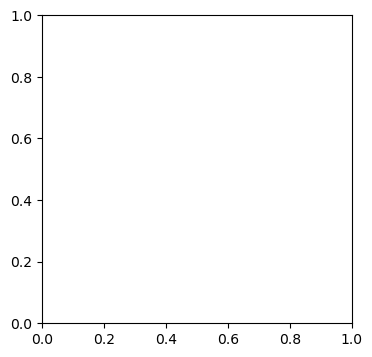

In [23]:
fig, ax = plt.subplots(figsize=(4,4))

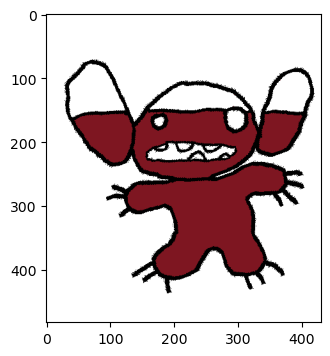

In [25]:
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(im_data)
plt.show() # for our purposes this gets rid of memory address

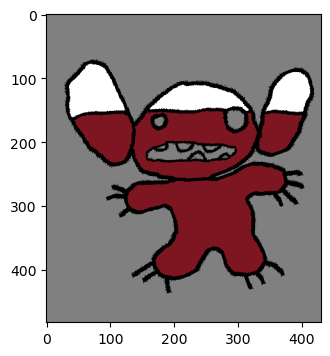

In [27]:
fig, ax = plt.subplots(figsize=(4,4))
ax.set_facecolor('gray')
ax.imshow(im_data)
plt.show()

Making a boolean mask to filter out only the good pixels:

In [34]:
# 255, 255, 255, 255 = pixels that are "good"
reds_good_mask = im_data[:,:,0] == 255
#reds_good_mask = im_data[:,:,0] = 255 messed up my assignment vs. boolean comparison
#. so, I had to go back an re-read in my data

# im_data[: means all of the y-pixels (rows), : means all of the x-pixels (columns), 
#.        0 means I'm only looking at my first color channel (R of RGBA)]

In [35]:
reds_good_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [36]:
im_data[reds_good_mask]

array([[255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       ...,
       [255, 255, 255, 255],
       [255, 255, 255, 255],
       [255, 255, 255, 255]], dtype=uint8)

In [37]:
reds_good_mask = im_data[:,:,0] == 255
green_good_mask = im_data[:,:,1] == 255
blue_good_mask = im_data[:,:,2] == 255
alpha_good_mask = im_data[:,:,3] == 255

pixel_mask_good = reds_good_mask & green_good_mask & blue_good_mask & alpha_good_mask

In [38]:
pixel_mask_good

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [39]:
ngood = len(im_data[pixel_mask_good])

In [40]:
ngood

11929

In [41]:
im_data_masked_good = im_data.copy() # copying instead of over-writing our image
im_data_masked_good[~pixel_mask_good] = 0 # not-good mask pixels set to see-through

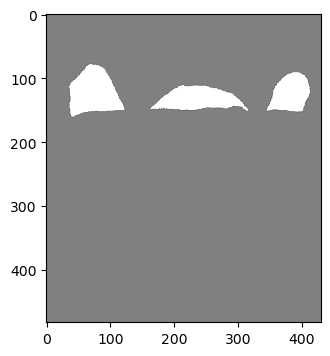

In [43]:
fig, ax = plt.subplots(figsize=(4,4)) # create image
ax.set_facecolor('gray') # set facecolor to gray (background)
ax.imshow(im_data_masked_good) # using masked image with non-good set to see-through, plot
plt.show()

In [45]:
#       [126,  22,  33, 255],
reds_bad_mask = im_data[:,:,0] == 126
green_bad_mask = im_data[:,:,1] == 22
blue_bad_mask = im_data[:,:,2] == 33
alpha_bad_mask = im_data[:,:,3] == 255

pixel_bad_mask = reds_bad_mask & green_bad_mask & blue_bad_mask & alpha_bad_mask

In [46]:
nbad = len(im_data[pixel_bad_mask])

In [47]:
nbad

40949

In [49]:
ngood/(nbad+ngood)

0.22559476530882408

## RGB(A) color deconstruction

In [50]:
im_data.shape

(483, 430, 4)

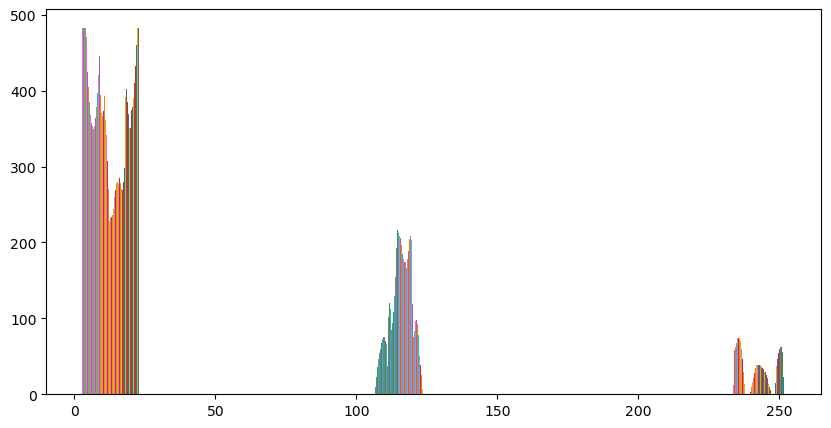

In [51]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(im_data[:,:,0]) # red channel only
plt.show()

In [52]:
im_data[:,:,0].shape

(483, 430)

In [53]:
im_data[:,:,0].flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [54]:
im_data[:,:,0].ravel()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

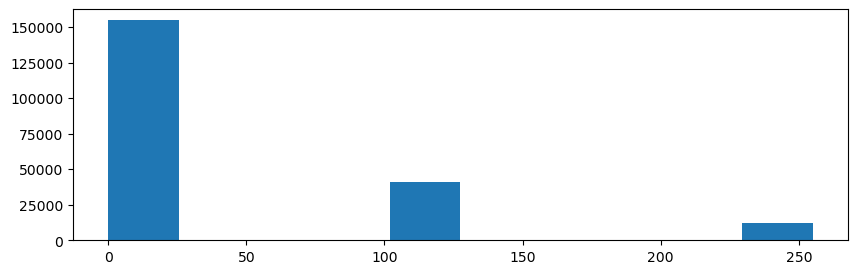

In [57]:
fig, ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten()) # this "flattens" our red channel into a 1D array
plt.show()

In [56]:
ax.hist?

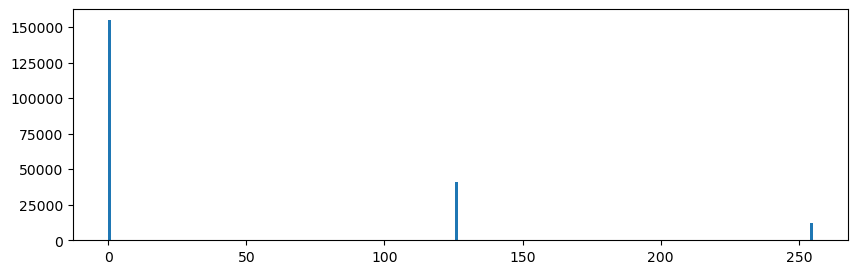

In [59]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256)
plt.show()

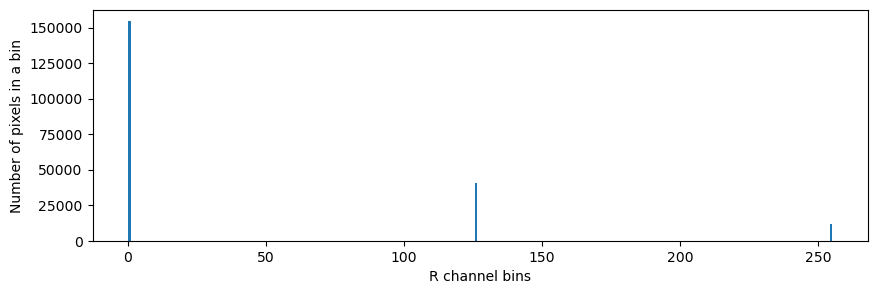

In [60]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256)
ax.set_xlabel('R channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

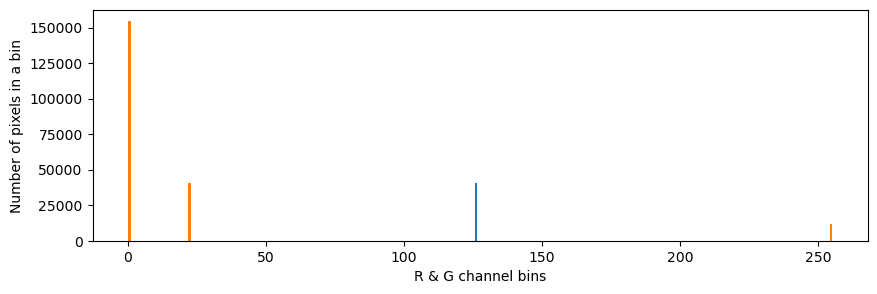

In [61]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256) # 0= Red channel
ax.hist(im_data[:,:,1].flatten(),bins=256) # 1= Green channel
ax.set_xlabel('R & G channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

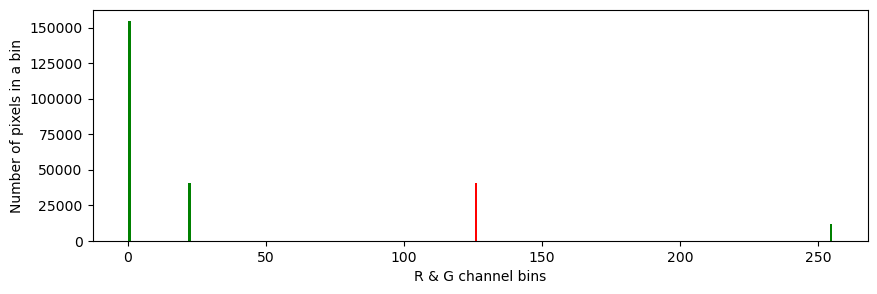

In [62]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0= Red channel
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1= Green channel
ax.set_xlabel('R & G channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

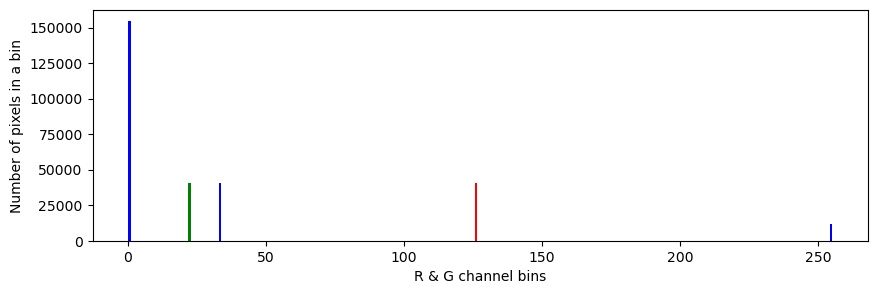

In [63]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256,color='red') # 0= Red channel
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green') # 1= Green channel
ax.hist(im_data[:,:,2].flatten(),bins=256,color='blue') # 2= Blue channel
ax.set_xlabel('R & G channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

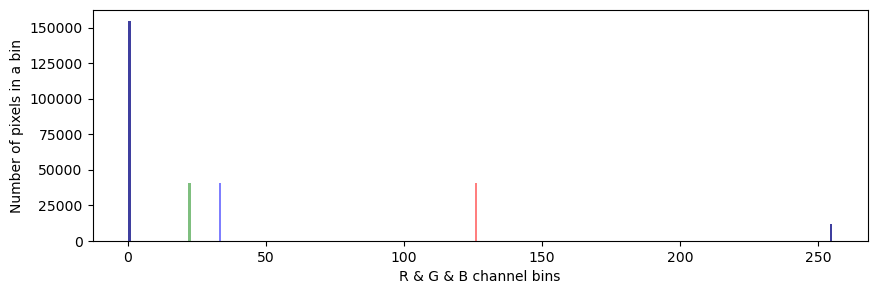

In [65]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(im_data[:,:,0].flatten(),bins=256,color='red',alpha=0.5) # 0= Red channel
ax.hist(im_data[:,:,1].flatten(),bins=256,color='green',alpha=0.5) # 1= Green channel
ax.hist(im_data[:,:,2].flatten(),bins=256,color='blue',alpha=0.5) # 2= Blue channel
ax.set_xlabel('R & G & B channel bins')
ax.set_ylabel('Number of pixels in a bin')
plt.show()

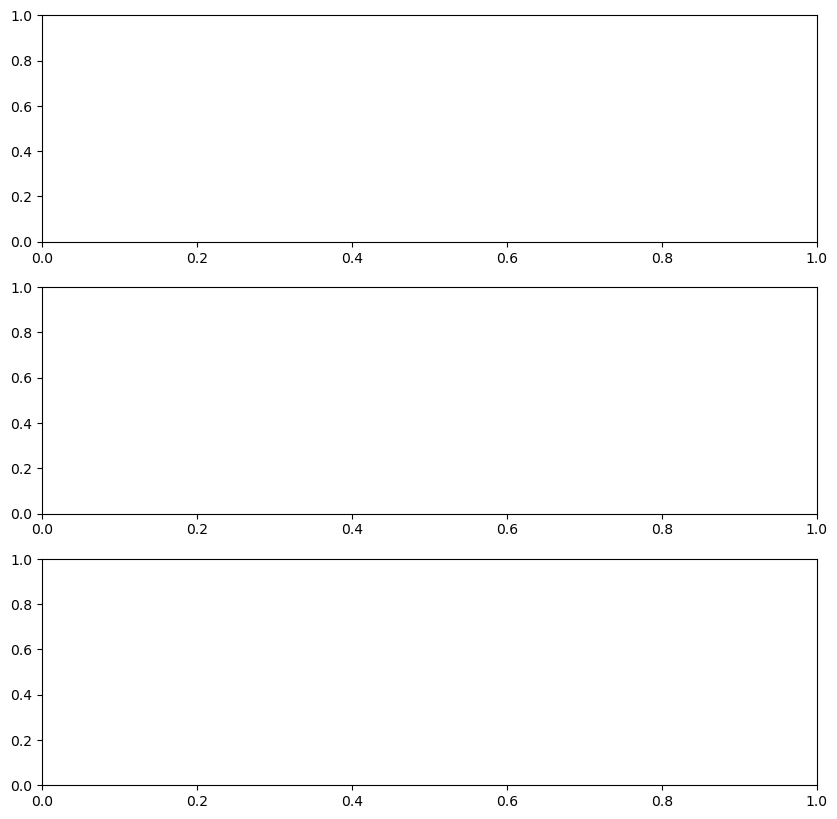

In [66]:
fig, ax = plt.subplots(3,1,figsize=(10,10))

In [67]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9e9a91490>,
      dtype=object)

In [68]:
ax[0]

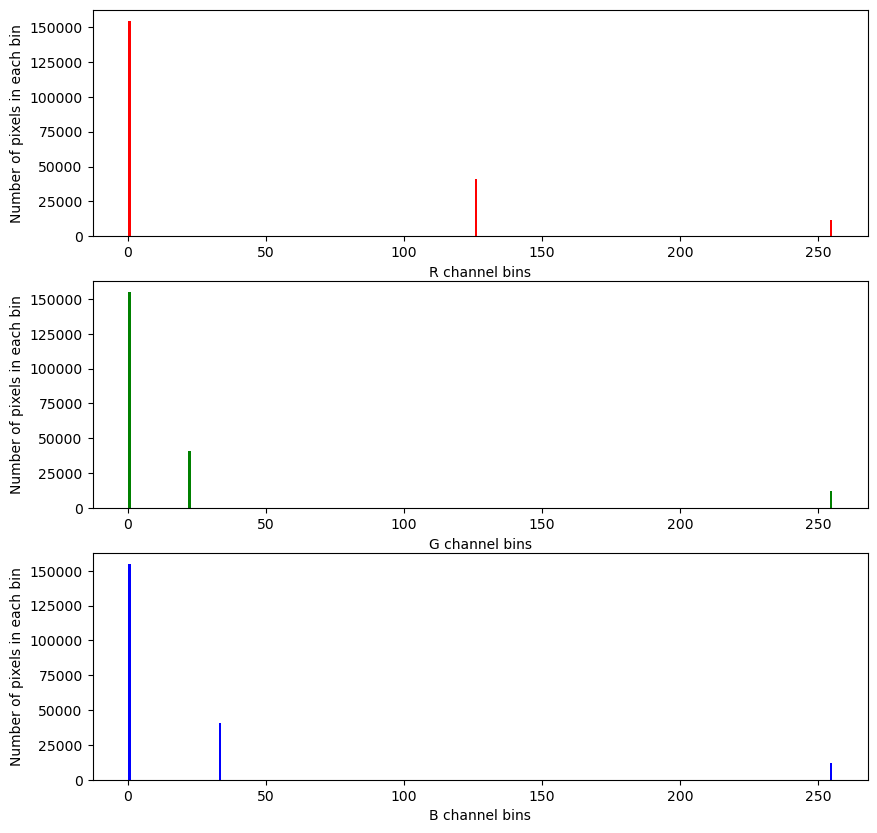

In [72]:
fig, ax = plt.subplots(3,1,figsize=(10,10))
ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red')
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green')
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue')

# add some x-labels
ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

# y-axis labels
# ax[0].set_ylabel('Number of pixels in each bin')
# ax[1].set_ylabel('Number of pixels in each bin')
# ax[2].set_ylabel('Number of pixels in each bin')
for i in range(3): ax[i].set_ylabel('Number of pixels in each bin')

plt.show()

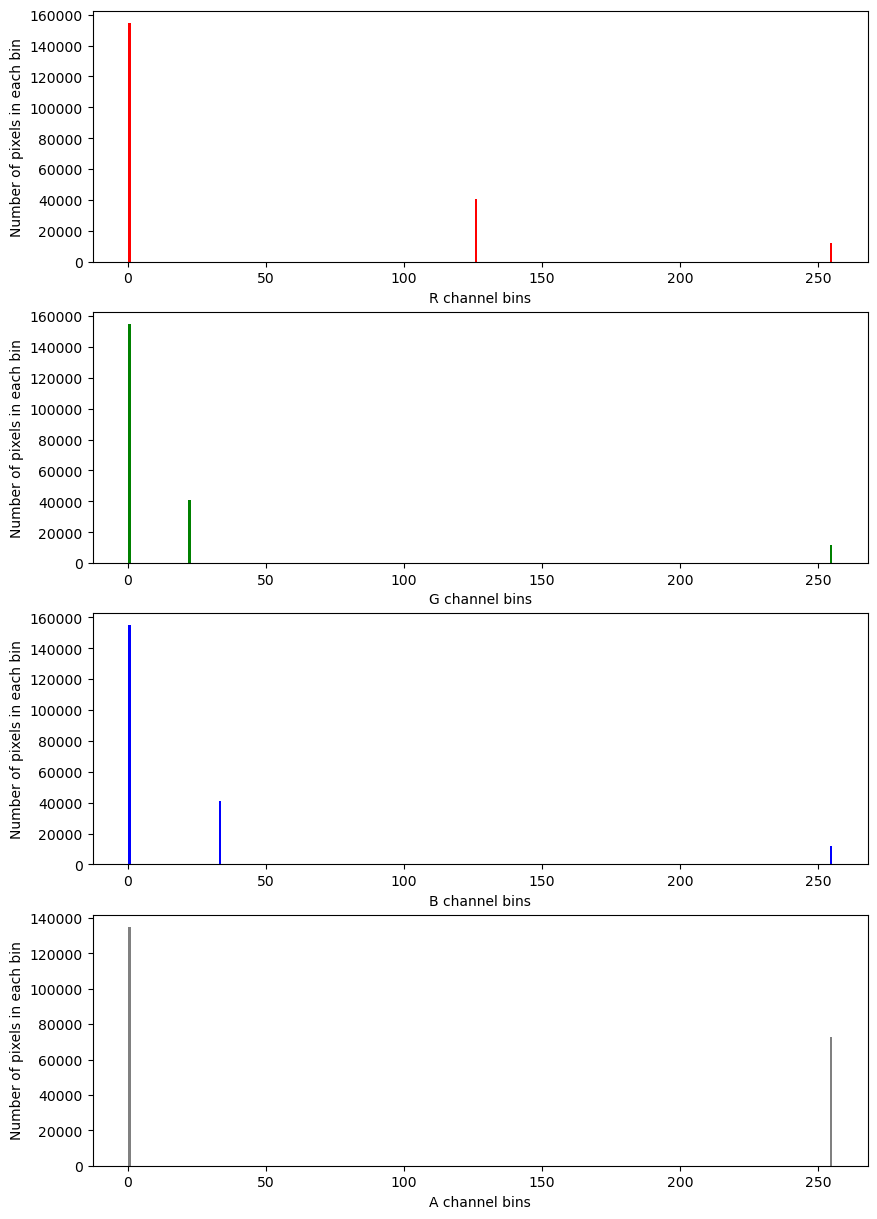

In [74]:
fig, ax = plt.subplots(4,1,figsize=(10,15)) # 4 rows of ax objects to include alpha
ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red')
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green')
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue')
ax[3].hist(im_data[:,:,3].flatten(),bins=256,color='gray')

# add some x-labels
ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')
ax[3].set_xlabel('A channel bins')

# y-axis labels
for i in range(4): ax[i].set_ylabel('Number of pixels in each bin')

plt.show()

Probably want to be able to compare our decomposition with our image.  Couple of ways to do that.  One way, just add to the end of our plot:

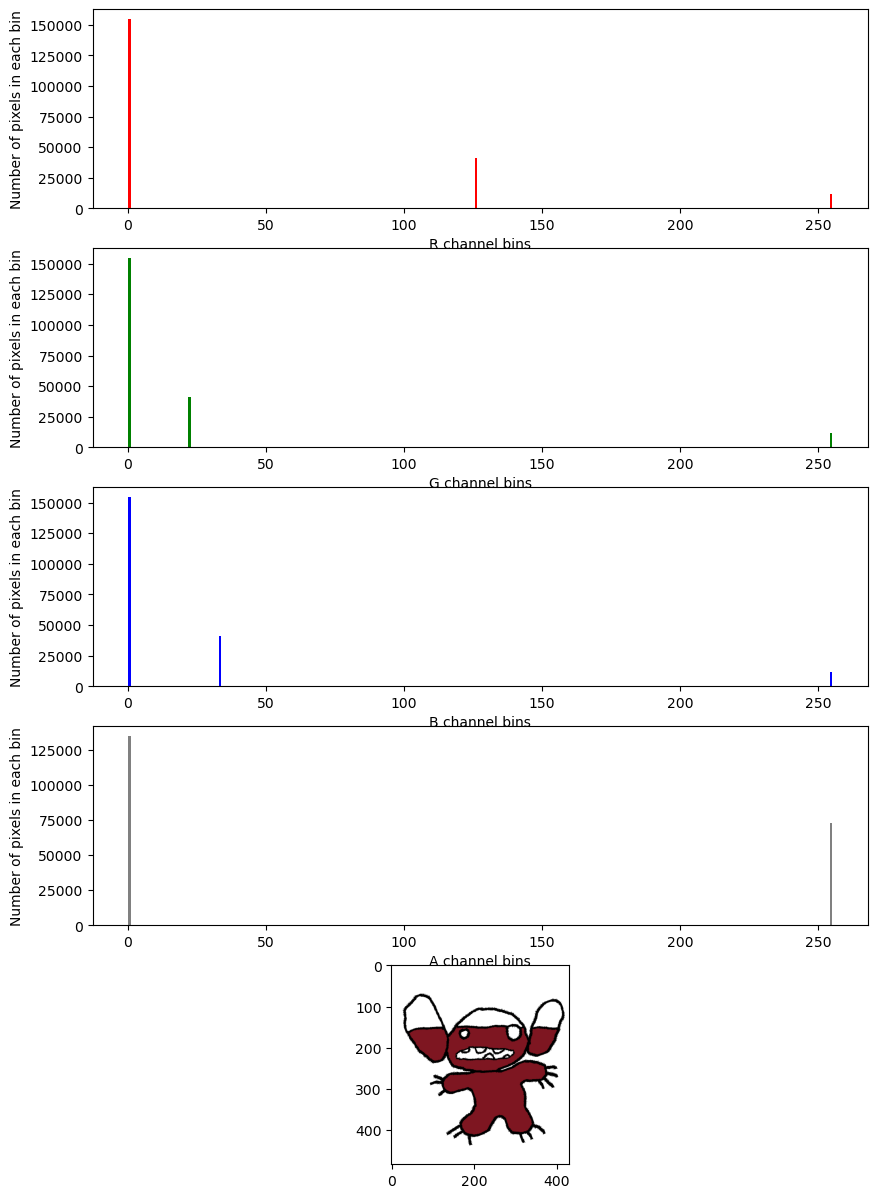

In [75]:
# using code from: https://uiuc-ischool-dataviz.github.io/is445_bcubcg_fall2022/nbv.html?notebook_name=%2Fis445_bcubcg_fall2022%2Fweek02%2Fprep_notebook_week02.ipynb
fig, ax = plt.subplots(5,1,figsize=(10,15)) # 5 rows of ax objects to include alpha & image
# decomposition in histograms
ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red')
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green')
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue')
ax[3].hist(im_data[:,:,3].flatten(),bins=256,color='gray')

# add some x-labels
ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')
ax[3].set_xlabel('A channel bins')

# y-axis labels
for i in range(4): ax[i].set_ylabel('Number of pixels in each bin')
    
# Now add in image for the last plot
ax[4].imshow(im_data)

plt.show()

Let's assume a 3-color channel image:

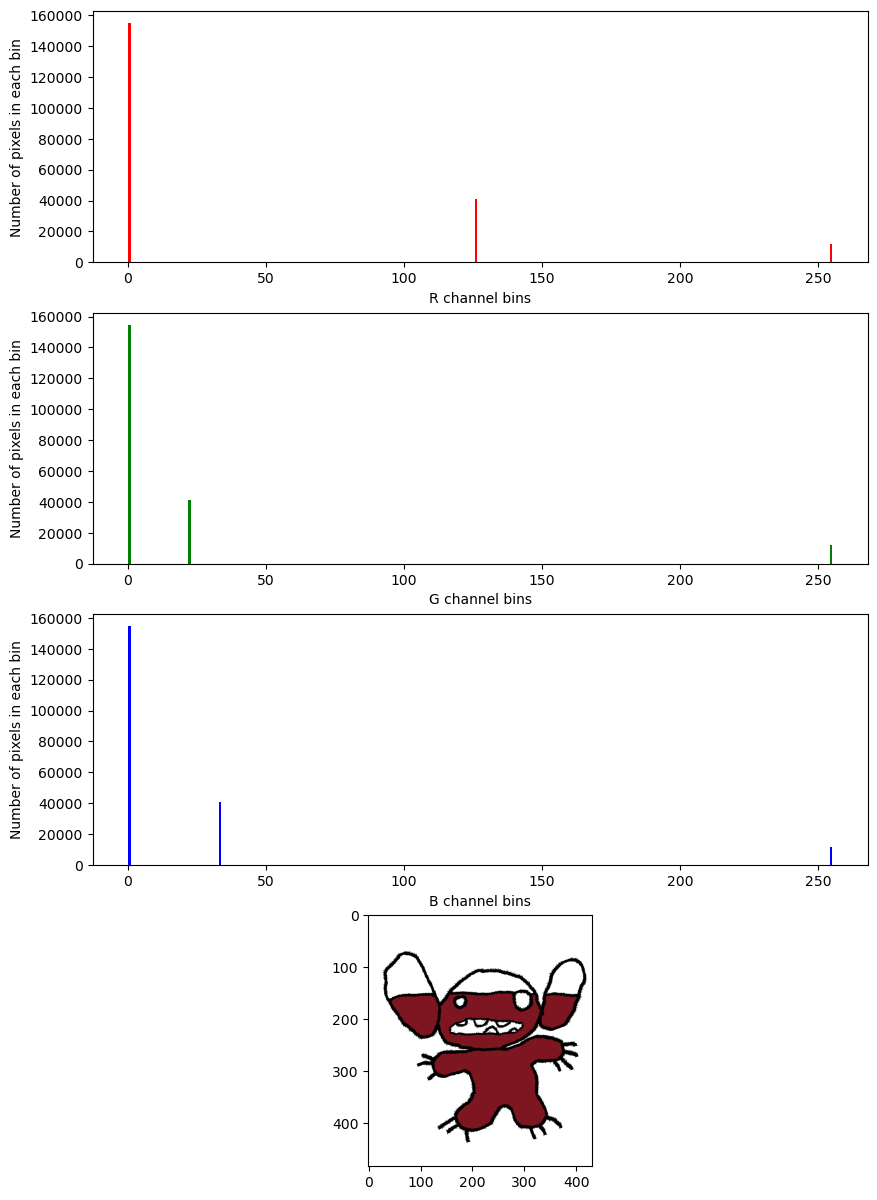

In [76]:
fig, ax = plt.subplots(4,1,figsize=(10,15)) # 4 rows of ax objects to include image
# decomposition in histograms
ax[0].hist(im_data[:,:,0].flatten(),bins=256,color='red')
ax[1].hist(im_data[:,:,1].flatten(),bins=256,color='green')
ax[2].hist(im_data[:,:,2].flatten(),bins=256,color='blue')

# add some x-labels
ax[0].set_xlabel('R channel bins')
ax[1].set_xlabel('G channel bins')
ax[2].set_xlabel('B channel bins')

# y-axis labels
for i in range(3): ax[i].set_ylabel('Number of pixels in each bin')
    
# Now add in image for the last plot
ax[3].imshow(im_data)

plt.show()

Slightly more complex layout:

In [77]:
fig = plt.figure(constrained_layout=True, figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

In [78]:
fig.add_gridspec?

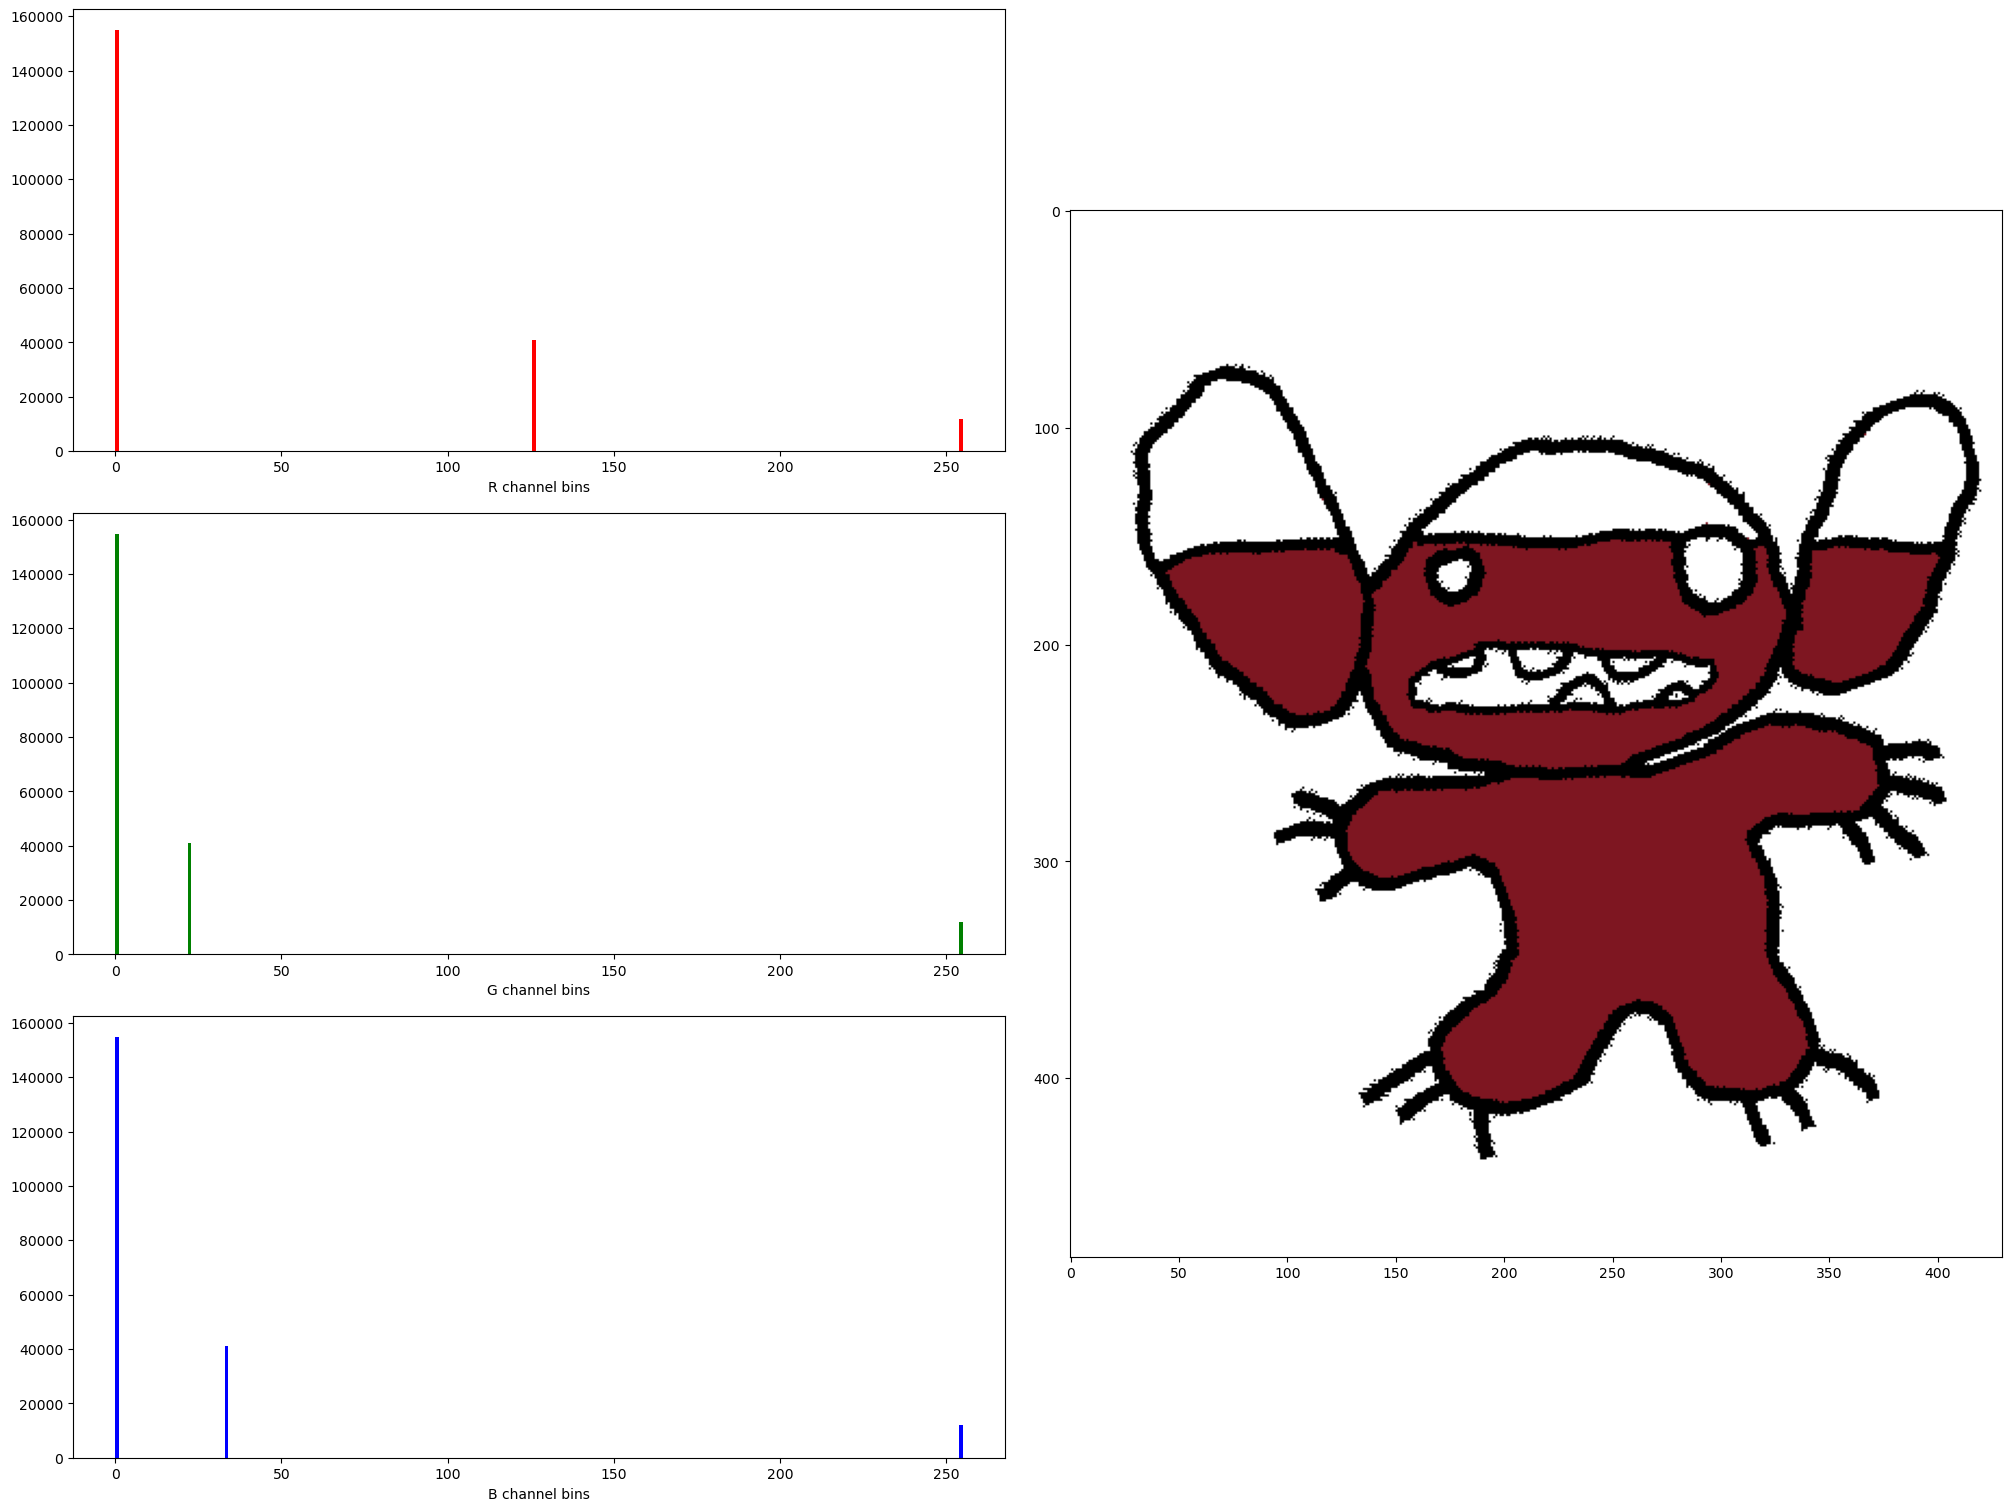

In [86]:
fig = plt.figure(constrained_layout=True, figsize=(20,15))
gs = fig.add_gridspec(3,2) # three rows, 2 columns (will have right column be only image)

# add red to the top of the plot (0), left (0)
ax1 = fig.add_subplot(gs[0,0]) #red
ax1.hist(im_data[:,:,0].flatten(),bins=256,color='red')
ax1.set_xlabel('R channel bins')

# green middle (1) left(0)
ax2 = fig.add_subplot(gs[1,0]) # green
ax2.hist(im_data[:,:,1].flatten(),bins=256,color='green')
ax2.set_xlabel('G channel bins')

# blue bottom (2), left (0)
ax3 = fig.add_subplot(gs[2,0]) #blue
ax3.hist(im_data[:,:,2].flatten(),bins=256,color='blue')
ax3.set_xlabel('B channel bins')

# image will span full column i.e. all of the rows (:) on the right (1) side
ax4 = fig.add_subplot(gs[:,1]) # image
ax4.imshow(im_data)

plt.show()

An example with a few more colors.

In [87]:
im2 = Image.open('/Users/jnaiman/Downloads/littleCorgiInHat.png')

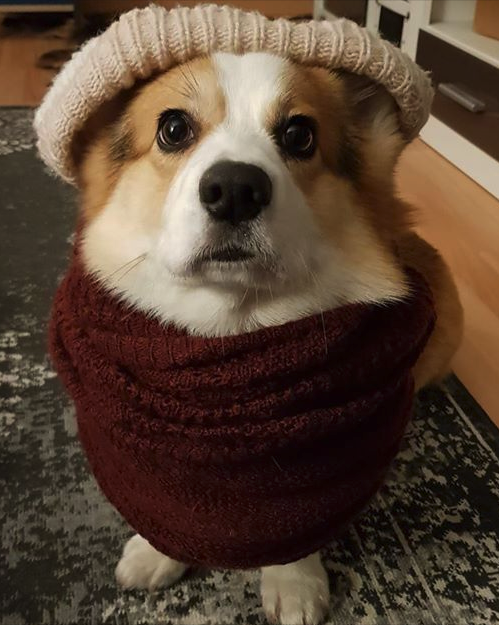

In [88]:
im2

In [91]:
im2_data = np.array(im2)

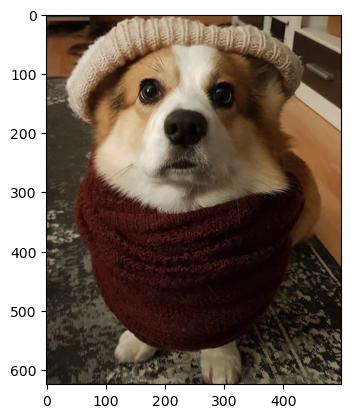

In [92]:
plt.imshow(im2_data)

In [93]:
im2_data.shape

(625, 499, 4)

Remake plot, but with new (more colorful image):

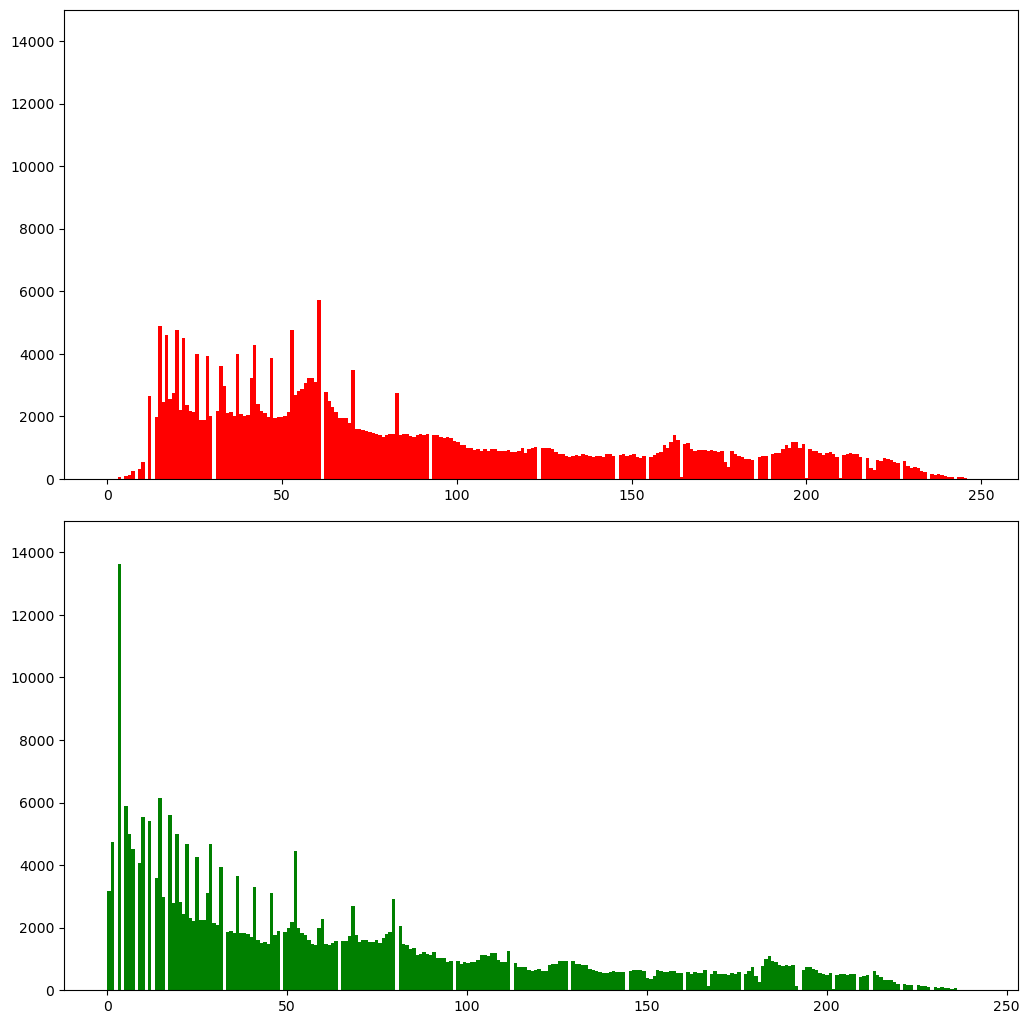

In [99]:
#fig, ax = plt.figure(constrained_layout=True, figsize=(20,15))
fig = plt.figure(constrained_layout=True, figsize=(20,15))
gs = fig.add_gridspec(3,2)

# red on top (0) left (0)
ax1 = fig.add_subplot(gs[0,0])
ax1.hist(im2_data[:,:,0].flatten(),bins=256,color='red')
ax1.set_ylim(0,15000)

# green middle(1) left (0)
ax2 = fig.add_subplot(gs[1,0])
ax2.hist(im2_data[:,:,1].flatten(), bins=256,color='green')
ax2.set_ylim(0,15000)

plt.show()